# Proyecto Final

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [91]:
house_prices = np.load("/users/rocioserguera/Desktop/proyecto_training_data.npy")

In [92]:
print(house_prices)
type(house_prices)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


numpy.ndarray

In [93]:
# Separando la base de datos en dos datasets

split = int(0.8*len(house_prices))
train, test = house_prices[:split, :], house_prices[split:, :]

In [94]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

In [95]:
df_train.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [96]:
# Nombrando columnas
df_train.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsabvGrd', 'YearBuilt', 'LotFrontage']
df_train

,SalePrice,OverallQual,1stFlrSF,TotRmsabvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


En el enunciado del pryecto se indica, que el objetivo es la predicción del precio de las viviendas, por lo que la variable objetivo es 'SalePrice'. Las demás variables se describen de la siguiente manera: 
* **OverallQual:** calidad general del material y del acabado
* **1erFlrSF:** área en pies cuadrados de la primera planta (o planta baja)
* **TotRmsAbvGrd:** total de habitaciones por encima del nivel del suelo (no incluye baños)
* **YearBuilt:** fecha original de construcción
* **LotFrontage:** pies lineales de calle de la parcela

In [97]:
# Viendo información de cada columna e inspeccionando si faltan datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
SalePrice       1168 non-null float64
OverallQual     1168 non-null float64
1stFlrSF        1168 non-null float64
TotRmsabvGrd    1168 non-null float64
YearBuilt       1168 non-null float64
LotFrontage     962 non-null float64
dtypes: float64(6)
memory usage: 54.9 KB


Se observa que faltan 206 datos en la columna LotFrontage (Linear feet of street connected to property), representando una falta del 17,6% de los datos. 
Además el formato de las columnas OverQual, TotRmsabvGrd y YearBuilt debería ser 'integer' en vez de 'float'; por lo que a continuacón se cambian.

In [98]:
# Cambiando formato 
df_train['OverallQual'] = df_train['OverallQual'].astype('int')
df_train['TotRmsabvGrd'] = df_train['TotRmsabvGrd'].astype('int')
df_train['YearBuilt'] = df_train['YearBuilt'].astype('int')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
SalePrice       1168 non-null float64
OverallQual     1168 non-null int64
1stFlrSF        1168 non-null float64
TotRmsabvGrd    1168 non-null int64
YearBuilt       1168 non-null int64
LotFrontage     962 non-null float64
dtypes: float64(3), int64(3)
memory usage: 54.9 KB


## Análisis exploratorio de datos

### Calculando para cada variable:
* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 

### SalePrice

In [99]:
print(df_train['SalePrice'].describe())
(df_train['SalePrice']).ptp()

count      1168.000000
mean     180590.277397
std       78815.697902
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


720100.0

### OverallQual     

In [100]:
print(df_train['OverallQual'].describe())
df_train['OverallQual'].ptp()

count    1168.000000
mean        6.101027
std         1.378025
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


9

### 1stFlrSF 

In [101]:
print(df_train['1stFlrSF'].describe())
df_train['1stFlrSF'].ptp()

count    1168.000000
mean     1156.323630
std       373.780374
min       334.000000
25%       882.000000
50%      1086.000000
75%      1390.250000
max      3228.000000
Name: 1stFlrSF, dtype: float64


/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


2894.0

### TotRmsabvGrd   

In [102]:
print(df_train['TotRmsabvGrd'].describe())
df_train['TotRmsabvGrd'].ptp()

count    1168.000000
mean        6.485445
std         1.609141
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsabvGrd, dtype: float64


/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


12

### YearBuilt 

In [103]:
print(df_train['YearBuilt'].describe())
df_train['YearBuilt'].ptp()

count    1168.000000
mean     1971.451199
std        29.951707
min      1875.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


135

### LotFrontage

In [104]:
print(df_train['LotFrontage'].describe())
df_train['LotFrontage'].ptp()

count    962.000000
mean      69.946985
std       23.478161
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64


/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


292.0

### Gráficas de las variables del dataset

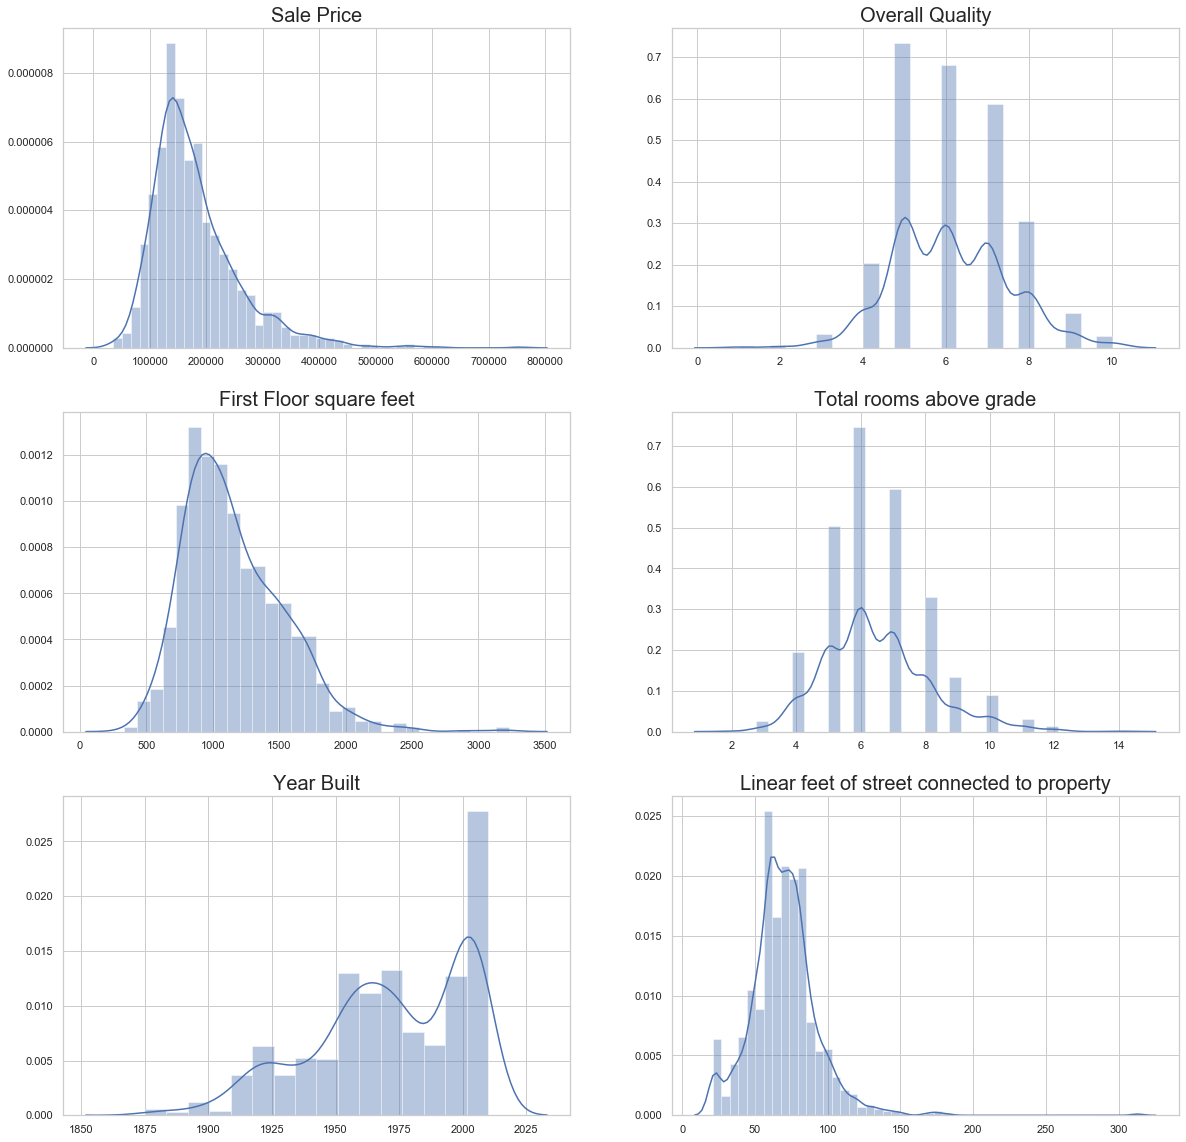

In [105]:
f, ax = plt.subplots(figsize=(20,20))
sns.set_style("whitegrid")

plt.subplot(3, 2, 1)
g = sns.distplot(df_train['SalePrice'], axlabel=False)
plt.title("Sale Price", fontdict={'fontsize' : 20})

plt.subplot(3, 2, 2)
g = sns.distplot(df_train['OverallQual'], axlabel=False)
plt.title("Overall Quality", fontdict={'fontsize' : 20})

plt.subplot(3,2,3)
g = sns.distplot(df_train['1stFlrSF'], axlabel=False)
plt.title("First Floor square feet", fontdict={'fontsize' : 20})

plt.subplot(3,2,4)
g = sns.distplot(df_train['TotRmsabvGrd'], axlabel=False)
plt.title("Total rooms above grade", fontdict={'fontsize' : 20})

plt.subplot(3,2,5)
g = sns.distplot(df_train['YearBuilt'], axlabel=False)
plt.title("Year Built", fontdict={'fontsize' : 20})

plt.subplot(3,2,6)
LotFrontage_no_NA = df_train['LotFrontage'].dropna()
g = sns.distplot(LotFrontage_no_NA, axlabel=False)
plt.title("Linear feet of street connected to property", fontdict={'fontsize' : 20})


plt.show(g)

Al analizar los gráficos anteriores, se decide normalizar todos los datos ya que, normalmente la regresión lineal suele funcionar mejor con datos normalizados, para que todas las variables estén a la misma escala.

Para cada variable independiente x :  
Calcular el coeficiente de correlación entre x y y  
graficar x vs y(scatterplot) usando matplotlib  
Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica.   

### Correlación

Antes de pasar al cálculo de los coeficientes de correlación, se clasifican las variables en cualitativa (ordinal o nominal) o cuantitativa (discreta o continua); basando la clasificación en lo siguiente:

1. Variables cualitativas: Son aquellas que expresan características o cualidades, y no pueden ser medidas con números. Pueden ser ordinales o nominales.
   * Variable cualitativa ordinal: Es aquella que presenta valores no numéricos, pero existe un orden.
   * Variable cualitativa nominal: Es aquella que presenta valores no numéricos, y no existe un orden.


2. Variables cuantitativas: Son aquellas que se expresan mediante un número, por lo tanto, se puede realizar operaciones aritméticas con ellas. Puede ser discretas o continuas.
   * Variable cuantitativa discreta: Es aquella que puede asumir un número contable de valores.
   * Variable cuantitativa continua: Es aquella que puede asumir un número incontable de valores.

SalePrice --> Cuantitativa continua
OverallQual --> Cualitativa ordinal
1stFlrSF --> Cuantitativa continua
TotRmsabvGrd --> Cuantitativa discreta
YearBuilt --> Cualitativa ordinal
LotFrontage --> Cuantitativa continua

#### ¿Cómo se interpreta el coeficiente de correlación?

Su dimensión indica el nivel de asociación entre las variables.

* Cuando es menor a cero ( $\rho$ < 0 ) Se dice que hay **correlación negativa**: Las variables se correlacionan en un sentido inverso.  
A valores altos en una de las variables, le suelen corresponder valores bajos en la otra variable y viceversa. Cuánto el valor esté más próximo a -1 dicho coeficiente de correlación más evidente será la covariación extrema.  
Si $\rho$ = -1 se habla de correlación negativa perfecta, la cual supone una determinación absoluta entre ambas variables, en sentido directo coexiste una relación lineal perfecta de pendiente negativa.  


* Cuando es mayor a cero ( $\rho$ > 0 ) Se dice que hay **correlación positiva**: Ambas variables se correlacionan en un sentido directo.  
A valores altos en una de las variables, le corresponden valores altos en la otra variable e igualmente en una situación inversa sucede con los valores bajos. Cuánto más próximo a +1 se encuentre el coeficiente de correlación más evidente será la covariación.  
Si $\rho$ = 1 Se habla de correlación positiva perfecta, la cual supone una determinación absoluta entre las variables, en sentido directo coexiste una relación lineal perfecta de pendiente positiva).  


* Cuando es igual a cero ( $\rho$ = 0 ) Se dice que las variables están incorrectamente relacionadas, no puede ser posible establecer algún sentido de covariación.  
No existe relación lineal, pero esto no implica necesariamente que las variables sean independientes, pudiendo existir relaciones no lineales entre las variables.  
Cuando las dos variables son independientes se dice que no están correlacionadas, aunque el resultado de reciprocidad no es necesariamente cierto.

In [106]:
# Se calcula el Coeficiente de Correlación
df_train.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsabvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
OverallQual,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
1stFlrSF,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
TotRmsabvGrd,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
YearBuilt,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
LotFrontage,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


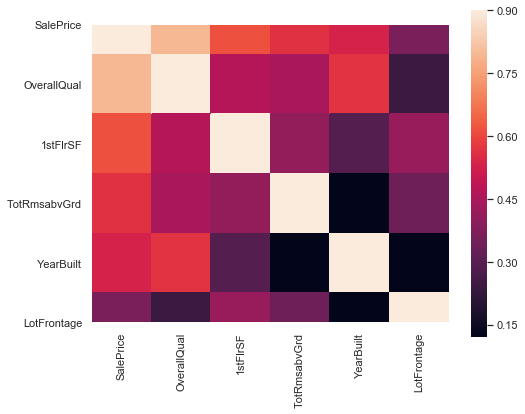

In [107]:
# Matriz de correlación:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.9, square=True);

El mapa de calor es una forma visual muy útil para conocer las variables y sus relaciones. 

A primera vista no parece haber una correlación significativa entre las variables independientes

Con respecto a la correlación con la variable a predecir 'SalePrice' se puede observar que:

* 'OverallQual' posee una correlación fuerte.
* '1stFloor', 'TotRmsAbvGrd' y 'YearBuilt' se encuentran medianamente corelacionadas.
* 'LotFrontage' muestra una baja correlación.

### Scatter plots

/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rocioserguera/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


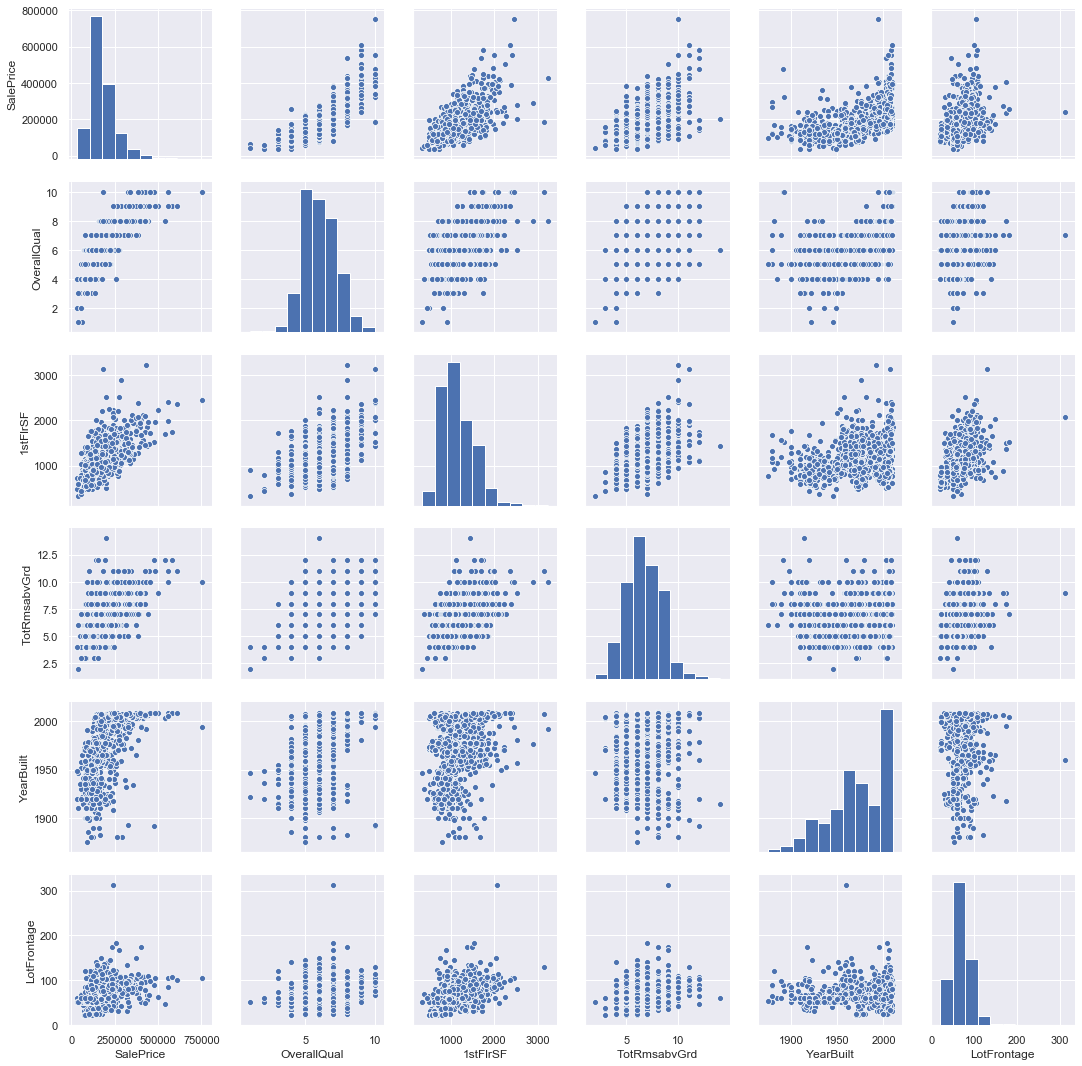

In [108]:
# Analizando las relaciones entre todas las variables
sns.set()
sns.pairplot(df_train, height = 2.5)
plt.show()

Aunque ya habíamos visto algunas de las figuras, este diagrama nos facilita una comprensión general sobre las relaciones entre las variables.

A continuación se grafica un scatter plot para cada variable independiente x, contra la variable a predecir y('SalePrice').

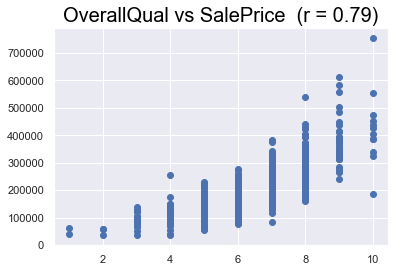

In [109]:
x= df_train['OverallQual']
y= df_train['SalePrice']
plt.scatter(x, y)
plt.title('OverallQual vs SalePrice  (r = 0.79)', fontdict={'fontsize' : 20}, color='black')
plt.show()

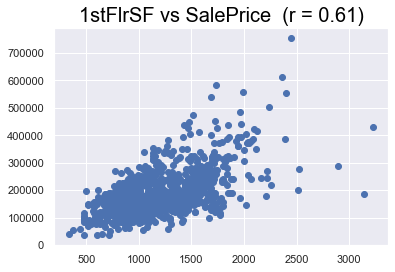

In [110]:
x= df_train['1stFlrSF']
y= df_train['SalePrice']
plt.scatter(x, y)
plt.title('1stFlrSF vs SalePrice  (r = 0.61)', fontdict={'fontsize' : 20}, color='black')
plt.show()

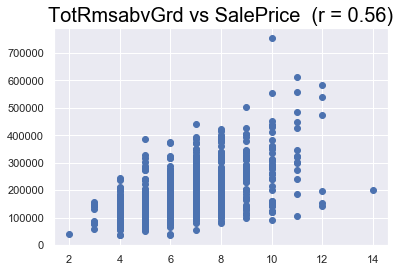

In [111]:
x= df_train['TotRmsabvGrd']
y= df_train['SalePrice']
plt.scatter(x, y)
plt.title('TotRmsabvGrd vs SalePrice  (r = 0.56)', fontdict={'fontsize' : 20}, color='black')
plt.show()

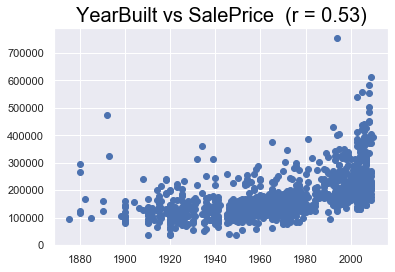

In [112]:
x= df_train['YearBuilt']
y= df_train['SalePrice']
plt.scatter(x, y)
plt.title('YearBuilt vs SalePrice  (r = 0.53)', fontdict={'fontsize' : 20}, color='black')
plt.show()

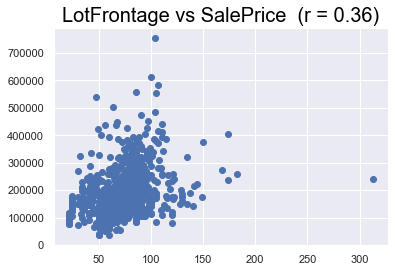

In [113]:
x= df_train['LotFrontage']
y= df_train['SalePrice']
plt.scatter(x, y)
plt.title('LotFrontage vs SalePrice  (r = 0.36)', fontdict={'fontsize' : 20}, color='black')
plt.show()

Basado en la gráfica y el coeficiente de correlación de cada par x,y se eligen las dos variables con más potencial predictivo: OverallQual y 1stFlr (o sea las dos que presentan mayor correlación con la variable a predecir) 

### Funciones

In [114]:
# Función orientada en el proyecto
def entrenamiento(x, y, iteraciones, lr, imprimir_error_cada=0):

    v_error = []
    total_datos = len(y)
    dic_parametros = {}
    m=0
    b=0
    parametros = [m,b] 
    observaciones = np.array([x, np.ones_like(x)], dtype = "float64")
    observaciones_trans = np.transpose(observaciones)
    
    # Ajustando datos de entrenamiento 
    
    for epochs in range(iteraciones):
        #observaciones = newMatrix(x)
        y_hat = np.dot(observaciones_trans,parametros)
        
        # Calculando error
        error = (np.sum(np.power((y - y_hat), 2))/ total_datos)*0.5
        v_error.append(error)
        
        # Calculando gradiente del error
        g = (np.array(y_hat-y, dtype = "float64")* observaciones).mean(1)
        
        # Actualizando parametros
        parametros = parametros - (lr*g)
        
        # Almacenando parametros
        dic_parametros[epochs] = parametros, v_error[epochs]

        
    # Mostrando error cada n iteraciones
    for key, values in dic_parametros.items():
        if imprimir_error_cada == 0:
            pass
        elif (key + 1)% imprimir_error_cada == 0:
            print('iteración número {}'.format(key+1), 'error:', values[1])
    
    
    return dic_parametros

In [115]:
# Función que permite visualizar cómo cambia el error en el tiempo
def error_vs_tiempo(datos):
    iteraciones =[]
    error=[]
    for epochs in datos_fun:
        iteraciones.append(epochs)
        error.append(datos_fun[epochs][1])
    
    plt.plot(iteraciones, error)
    plt.title('Cambio del error en el tiempo')
    plt.xlabel('Iteraciones')
    plt.ylabel('Error')
    
    return plt.show()

In [116]:
# Función que permite visualizar cómo evoluciona el modelo entrenado en el tiempo
def modelo_vs_tiempo(x, y, datos, n):
    for key, values in datos.items():
        if (key + 1)% n == 0:
            y_mod = datos[key][0][0]*x + datos[key][0][1]
            plt.scatter(x,y)
            plt.plot(x, y_mod, color='red', linewidth = 3)
            plt.title('Iteración: ' + str(key + 1))
            plt.xlabel('Variable independiente')
            plt.ylabel('Variable dependiente')
            plt.show()

A continuación se utilizarán las funciones definidas anteriormente para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas.

OverallQual vs SalePrice

Se realizaron pruebas variando el valor de lr y de las iteraciones, concluyendo lo siguiente:
* el máximo número de lr que se puede usar es de 0.04, cualquier valor por encima (0.05, etc.) anulan el valor del error.
* con lr por debajo de 0.009 habría que repetir más iteraciones para lograr el mismo resultado, lo cual conduciría a un mayor cómputo de datos.  
* con un lr de 0.04, despues de las 5000 iteraciones el número de error se reduce muy poco.  

Por las cuestiones anteriores se decide utilizar un lr de 0.04 y realizar 5000 iteraciones.

iteración número 1000 error: 1152530101.6535218
iteración número 2000 error: 1147042893.5813642
iteración número 3000 error: 1146919077.7893562
iteración número 4000 error: 1146916283.9550145
iteración número 5000 error: 1146916220.9136999


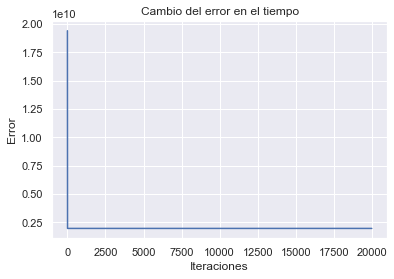

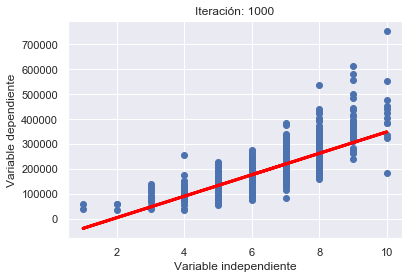

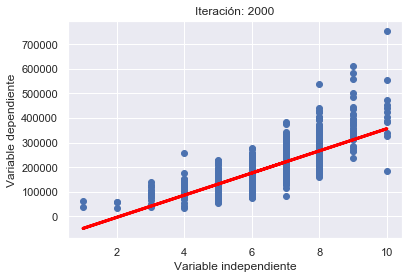

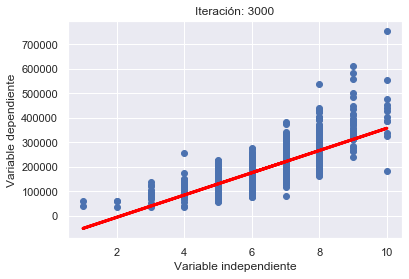

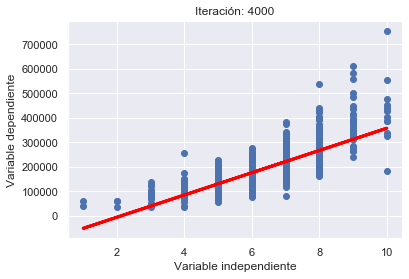

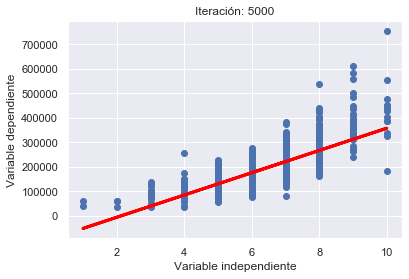

In [142]:
y = df_train['SalePrice']
x = df_train['OverallQual']

datos_1 = entrenamiento(x, y, 5000, 0.04, 1000)
error_vs_tiempo(datos_1)
modelo_vs_tiempo(x,y,datos_1,n=1000)

1stFlrSF vs SalePrice

Se realizaron pruebas variando el lr y las iteraciones concluyendo lo siguiente:

* el máximo número de lr que se puede usar es de 0.000001
* con lr por debajo de 0.000001 habría que repetir más iteraciones para lograr el mismo resultado, lo cual conduciría a un mayor cómputo de datos.
* con un lr de 0.000001, despues de las 20000 iteraciones el número de error se reduce muy poco.  

Por las cuestiones anteriores se decide utilizar un lr de 0.000001 y 20000 iteraciones

iteración número 10000 error: 1968010997.892769
iteración número 20000 error: 1967929056.0278642


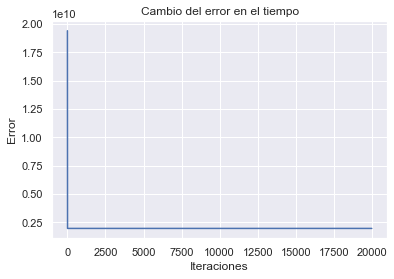

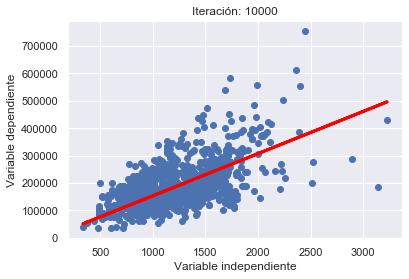

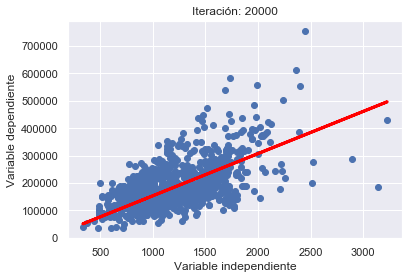

In [143]:
y = df_train['SalePrice']
x = df_train['1stFlrSF']

datos_2 = entrenamiento(x, y, 20000, 0.000001, 10000)
error_vs_tiempo(datos_2)
modelo_vs_tiempo(x,y,datos_2,n=10000)

### Regresión lineal con Scikit-learn

In [138]:
# Importando la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression
# Transformando a dataframe cada columna
overallQual = pd.DataFrame(df_train['OverallQual'])
salePrice = pd.DataFrame(df_train['SalePrice'])

lr_overallqual = LinearRegression().fit(overallQual,salePrice)

In [141]:
firstFlrSF = pd.DataFrame(df_train['1stFlrSF'])
salePrice = pd.DataFrame(df_train['SalePrice'])

lr_1stFlrSF = LinearRegression().fit(firstFlrSF,salePrice)

In [148]:
# Creando función para predecir con el modelo manual
def pred_modelo_manual(datos):
    list_pred = []
    for values in datos():
        y_mod = datos[key][0][0]*x + datos[key][0][1]
        list_pred.append(y_mod)
    return list_pred

In [149]:
pred_modelo_manual(datos_1)

[0       4.068255e+07
 1       5.997482e+07
 2       4.372370e+07
 3       4.567193e+07
 4       5.441523e+07
             ...     
 1163    5.978475e+07
 1164    6.805287e+07
 1165    7.137912e+07
 1166    8.050256e+07
 1167    4.557690e+07
 Name: 1stFlrSF, Length: 1168, dtype: float64, 0       1.619568e+07
 1       2.387606e+07
 2       1.740638e+07
 3       1.818199e+07
 4       2.166275e+07
             ...     
 1163    2.380039e+07
 1164    2.709199e+07
 1165    2.841619e+07
 1166    3.204829e+07
 1167    1.814415e+07
 Name: 1stFlrSF, Length: 1168, dtype: float64, 0       3.099942e+07
 1       4.570001e+07
 2       3.331675e+07
 3       3.480130e+07
 4       4.146363e+07
             ...     
 1163    4.555518e+07
 1164    5.185543e+07
 1165    5.439002e+07
 1166    6.134202e+07
 1167    3.472888e+07
 Name: 1stFlrSF, Length: 1168, dtype: float64, 0       2.211475e+07
 1       3.260221e+07
 2       2.376794e+07
 3       2.482702e+07
 4       2.957996e+07
             ...     
 116